# Forex Data Collection and Exploration

## Dataset Specifications
- **Pairs**: 7 major currency pairs vs USD
- **Period**: January 2007 - January 2024 (17 years)
- **Frequency**: Daily closing prices
- **Source**: Yahoo Finance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration
import sys
sys.path.append('../')
from config import CURRENCY_PAIRS, START_DATE, END_DATE

# Display settings
plt.style.use('seaborn-v0_8')

print(f"Pairs to download: {len(CURRENCY_PAIRS)}")
print(f"Period: {START_DATE} to {END_DATE}")

Pairs to download: 7
Period: 2007-01-01 to 2024-01-01


In [2]:
# Install yfinance if needed
try:
    import yfinance as yf
except ImportError:
    import subprocess
    subprocess.check_call(['pip', 'install', 'yfinance'])
    import yfinance as yf

In [3]:
def download_forex_data(symbols, start_date, end_date):
    """
    Download forex data from Yahoo Finance
    
    Parameters:
    symbols: list of currency pair symbols
    start_date: start date string 'YYYY-MM-DD'
    end_date: end date string 'YYYY-MM-DD'
    
    Returns:
    DataFrame with closing prices for all currency pairs
    """
    
    data = {}
    
    for symbol in symbols:
        try:
            ticker = yf.Ticker(symbol)
            hist = ticker.history(start=start_date, end=end_date)
            data[symbol.replace('=X', '')] = hist['Close']
        except Exception as e:
            print(f"Error downloading {symbol}: {e}")
    
    # Combine into single DataFrame
    df = pd.DataFrame(data)
    df.index.name = 'Date'
    
    return df

# Download the data
forex_data = download_forex_data(CURRENCY_PAIRS, START_DATE, END_DATE)
forex_data.head()

,EURUSD,GBPUSD,USDJPY,USDCHF,USDCAD,AUDUSD,NZDUSD
Date,,,,,,,
2007-01-01 00:00:00+00:00,1.321895,1.964212,118.879997,1.2166,1.1643,0.791014,0.705617
2007-01-02 00:00:00+00:00,1.327598,1.973399,118.830002,1.2131,1.1648,0.796178,0.706814
2007-01-03 00:00:00+00:00,1.317107,1.952210,119.339996,1.2250,1.1726,0.792205,0.706414
2007-01-04 00:00:00+00:00,1.309295,1.942993,118.830002,1.2320,1.1776,0.783392,0.695797
2007-01-05 00:00:00+00:00,1.298499,1.930800,118.690002,1.2374,1.1738,0.780275,0.687711


In [4]:
print(f"Shape: {forex_data.shape}")
print(f"Missing values per currency:{forex_data.isnull().sum()}")

Shape: (4425, 7)
Missing values per currency:EURUSD    17
GBPUSD     5
USDJPY    17
USDCHF     4
USDCAD     2
AUDUSD     2
NZDUSD     1
dtype: int64


In [9]:
forex_data.interpolate(method='linear', inplace=True)
print(f"Missing values per currency:{forex_data.isnull().sum()}")

Missing values per currency:EURUSD    0
GBPUSD    0
USDJPY    0
USDCHF    0
USDCAD    0
AUDUSD    0
NZDUSD    0
dtype: int64


In [18]:
# Descriptive statistics
forex_data.describe()

,EURUSD,GBPUSD,USDJPY,USDCHF,USDCAD,AUDUSD,NZDUSD
count,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000
mean,1.235656,1.487553,106.785611,0.981445,1.188548,0.814772,0.713482
std,0.137167,0.221193,16.403133,0.085681,0.139558,0.124942,0.075375
min,0.959619,1.072754,75.739998,0.722800,0.918700,0.574290,0.492805
25%,1.117706,1.301744,97.092003,0.922100,1.038400,0.715461,0.661971
50%,1.212415,1.482338,108.114998,0.967460,1.244930,0.773230,0.708411
75%,1.346475,1.605832,114.323997,1.004900,1.315060,0.916590,0.770001
max,1.598798,2.108192,151.645996,1.253700,1.457800,1.103497,0.882379


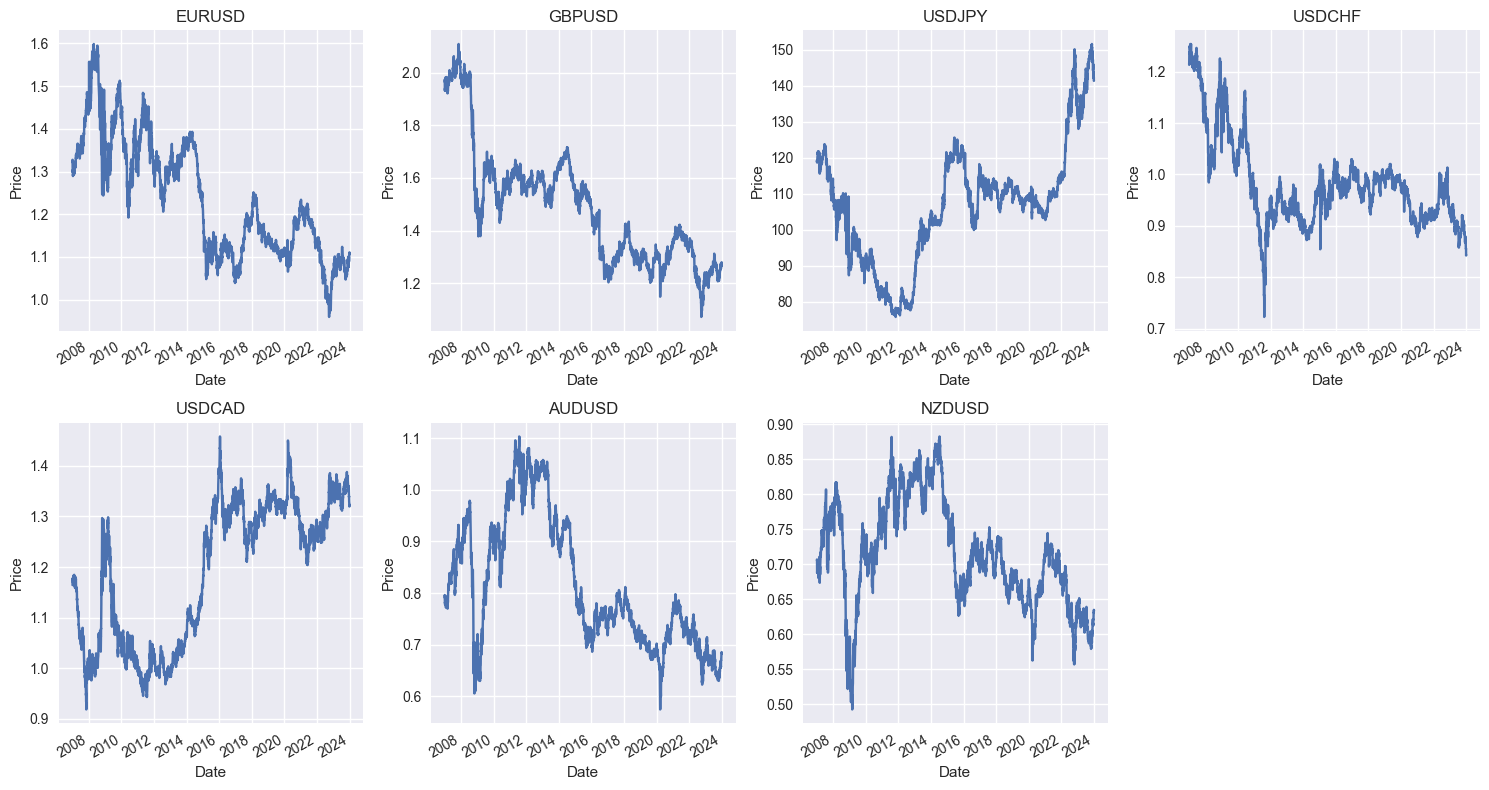

In [17]:
# Price evolution plot
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()

for i, currency in enumerate(forex_data.columns):
    forex_data[currency].plot(ax=axes[i], title=currency)
    axes[i].set_ylabel('Price')

# Remove empty subplot
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

In [13]:
# Transform to common USD denominator
# Invert USD/XXX pairs to become XXX/USD
forex_data_transformed = forex_data.copy()

# Invert the USD/XXX pairs
forex_data_transformed['JPYUSD'] = 1 / forex_data_transformed['USDJPY']
forex_data_transformed['CHFUSD'] = 1 / forex_data_transformed['USDCHF']  
forex_data_transformed['CADUSD'] = 1 / forex_data_transformed['USDCAD']

# Drop original USD/XXX columns
forex_data_transformed = forex_data_transformed.drop(['USDJPY', 'USDCHF', 'USDCAD'], axis=1)

# Reorder columns
forex_data_transformed = forex_data_transformed[['EURUSD', 'GBPUSD', 'JPYUSD', 'CHFUSD', 'CADUSD', 'AUDUSD', 'NZDUSD']]

In [15]:
# Descriptive statistics
forex_data_transformed.describe()

,EURUSD,GBPUSD,JPYUSD,CHFUSD,CADUSD,AUDUSD,NZDUSD
count,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000
mean,1.235656,1.487553,0.009592,1.026111,0.853520,0.814772,0.713482
std,0.137167,0.221193,0.001515,0.083175,0.103862,0.124942,0.075375
min,0.959619,1.072754,0.006594,0.797639,0.685965,0.574290,0.492805
25%,1.117706,1.301744,0.008747,0.995124,0.760422,0.715461,0.661971
50%,1.212415,1.482338,0.009249,1.033634,0.803258,0.773230,0.708411
75%,1.346475,1.605832,0.010300,1.084481,0.963020,0.916590,0.770001
max,1.598798,2.108192,0.013203,1.383509,1.088495,1.103497,0.882379


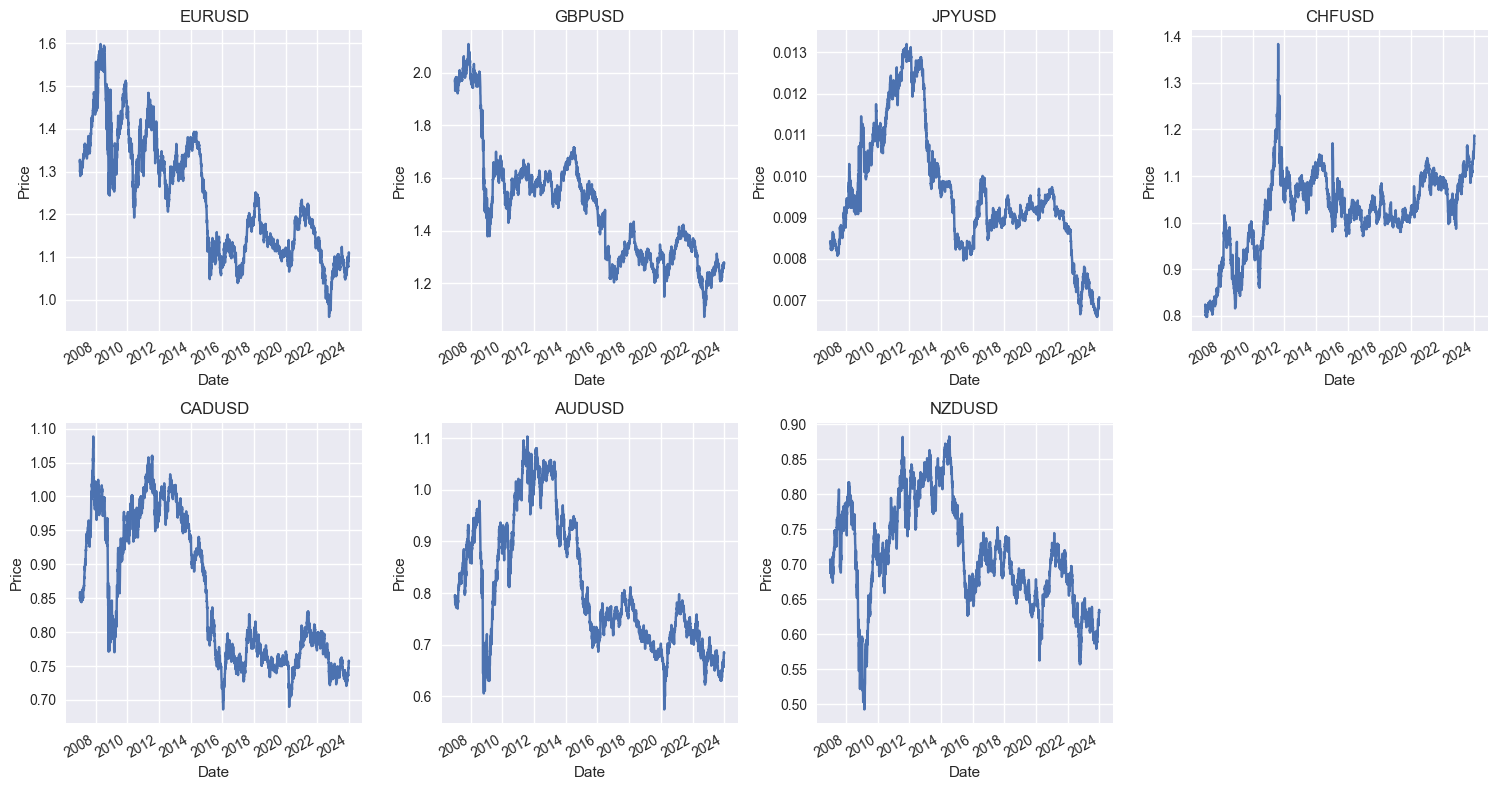

In [16]:
# Price evolution plot
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()

for i, currency in enumerate(forex_data_transformed.columns):
    forex_data_transformed[currency].plot(ax=axes[i], title=currency)
    axes[i].set_ylabel('Price')

# Remove empty subplot
axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

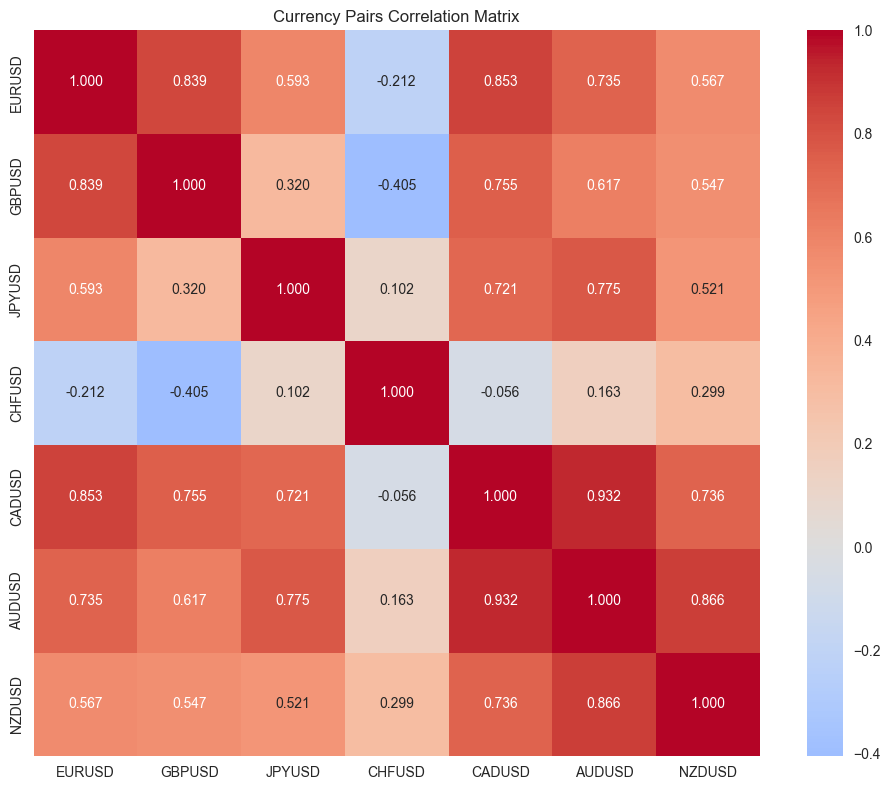

Highest correlations:
CADUSD  AUDUSD    0.932357
AUDUSD  NZDUSD    0.865955
EURUSD  CADUSD    0.852826
        GBPUSD    0.838757
JPYUSD  AUDUSD    0.775129
GBPUSD  CADUSD    0.755354
CADUSD  NZDUSD    0.735890
EURUSD  AUDUSD    0.735273
JPYUSD  CADUSD    0.721248
GBPUSD  AUDUSD    0.616966
dtype: float64


In [20]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = forex_data_transformed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Currency Pairs Correlation Matrix')
plt.tight_layout()
plt.show()

# Print highest correlations (excluding diagonal)
corr_values = correlation_matrix.where(np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1))
corr_stack = corr_values.stack().sort_values(ascending=False)
print("Highest correlations:")
print(corr_stack.head(10))

In [19]:
# Save to CSV
forex_data_transformed.to_csv('../data/forex_data.csv')